Карпеченко Д.М., dz10, v.0.1, 23.10.2022

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Снять ограничения на вывод колонок
pd.set_option('display.max_columns', None)
#Снять ограничения на вывод строк
pd.set_option('display.max_rows', 15)
data = pd.read_csv('D:\TeachMeSkills\DZ\dz10\credit_train.csv', sep = ';',decimal=',' )


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  object 
 8   score_shk             170739 non-null  float64
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

array([[<AxesSubplot:title={'center':'client_id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'credit_sum'}>],
       [<AxesSubplot:title={'center':'credit_month'}>,
        <AxesSubplot:title={'center':'score_shk'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'credit_count'}>,
        <AxesSubplot:title={'center':'overdue_credit_count'}>,
        <AxesSubplot:title={'center':'open_account_flg'}>]], dtype=object)

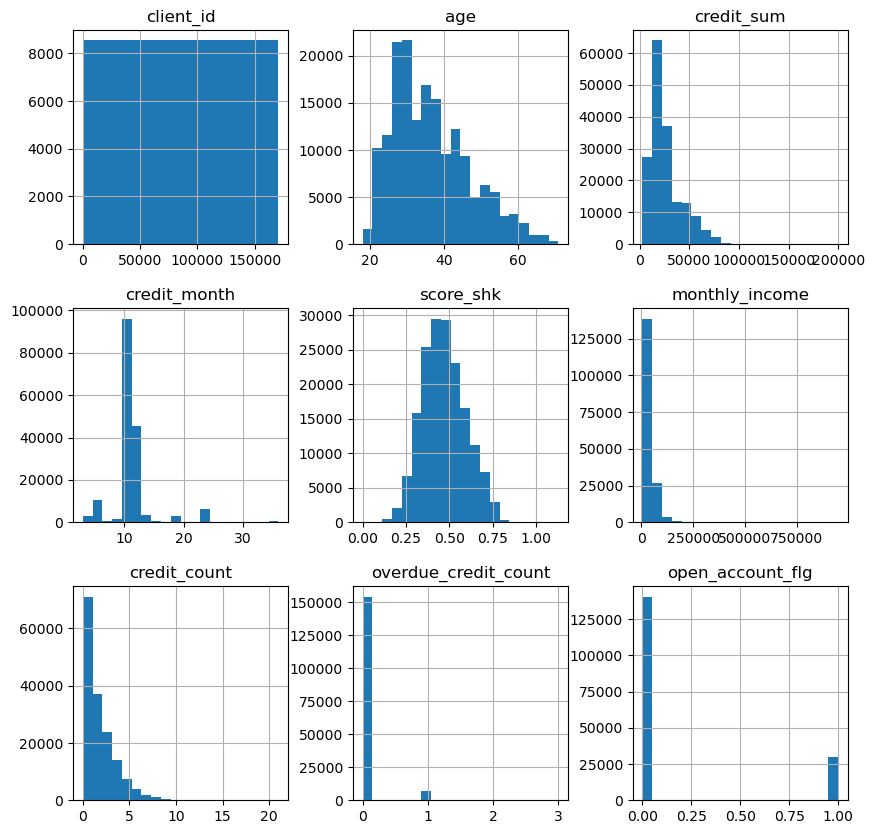

In [3]:
data.hist(bins = 20, figsize = (10, 10))

Попробуем привести к единообразию столбец living_region

In [4]:
region_pattern = [('АДЫГ', 'РЕСПУБЛИКА АДЫГЕЯ'),
('ЛИП','ЛИПЕЦКАЯ ОБЛАСТЬ'),
('БАШК', 'РЕСПУБЛИКА БАШКОРТОСТАН'),
 ('МАГАД', 'МАГАДАНСКАЯ ОБЛАСТЬ'),
('БУРЯ', 'РЕСПУБЛИКА БУРЯТИЯ'),
('МОСКОВСКАЯ', 'МОСКОВСКАЯ ОБЛАСТЬ'),
('АЛТА', 'РЕСПУБЛИКА АЛТАЙ'),
('МУРМАН', 'МУРМАНСКАЯ ОБЛАСТЬ'),
('ДАГЕ', 'РЕСПУБЛИКА ДАГЕСТАН'),
('НИЖЕГОР', 'НИЖЕГОРОДСКАЯ ОБЛАСТЬ'),
('ИНГУШ', 'РЕСПУБЛИКА ИНГУШЕТИЯ'),
('НОВГОР', 'НОВГОРОДСКАЯ ОБЛАСТЬ'),
('КАБАР', 'КАБАРДИНО-БАЛКАРСКАЯ РЕСПУБЛИКА'),
('НОВОСИ', 'НОВОСИБИРСКАЯ ОБЛАСТЬ'),
('КАЛМЫ', 'РЕСПУБЛИКА КАЛМЫКИЯ'),
('ОМС', 'ОМСКАЯ ОБЛАСТЬ'),
('КАРАЧ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА'),
('ОРЕНБ', 'ОРЕНБУРГСКАЯ ОБЛАСТЬ'),
('КАРЕЛ', 'РЕСПУБЛИКА КАРЕЛИЯ'),
('ОРЛОВС', 'ОРЛОВСКАЯ ОБЛАСТЬ'),
('КОМИ', 'РЕСПУБЛИКА КОМИ'),
('ПЕНЗ', 'ПЕНЗЕНСКАЯ ОБЛАСТЬ'),
('МАРИ', 'РЕСПУБЛИКА МАРИЙ ЭЛ'),
('ПЕРМ', 'ПЕРМСКИЙ КРАЙ'),
('МОРДО', 'РЕСПУБЛИКА МОРДОВИЯ'),
('ПСКОВ', 'ПСКОВСКАЯ ОЛАСТЬ'),
('САХА', 'РЕСПУБЛИКА САХА-ЯКУТИЯ'),
('РОСТО', 'РОСТОВСКАЯ ОБЛАСТЬ'),
('ОСЕТ', 'РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ'),
('РЯЗ', 'РЯЗАНСКАЯ ОБЛАСТЬ'),
('ТАТАР', 'РЕСПУБЛИКА ТАТАРСТАН'),
('САМАР', 'САМАРСКАЯ ОБЛАСТЬ'),
('ТЫВА', 'РЕСПУБЛИКА ТЫВА'),
('САРАТ', 'САРАТОВСКАЯ ОБЛАСТЬ'),
('УДМУР', 'УДМУРТСКАЯ РЕСПУБЛИКА'),
('САХАЛ', 'САХАЛИНСКАЯ ОБЛАСТЬ'),
('ХАКАС', 'РЕСПУБЛИКА ХАКАСИЯ'),
('СВЕРД', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'),
('ЧЕЧНЯ', 'РЕСПУБЛИКА ЧЕЧНЯ'),
('СМОЛ', 'СМОЛЕНСКАЯ ОБЛАСТЬ'),
('ЧУВАШ', 'ЧУВАШСКАЯ РЕСПУБЛИКА — ЧУВАШИЯ'),
('ТАМБ', 'ТАМБОВСКАЯ ОБЛАСТЬ'),
('АЛТАЙ', 'АЛТАЙСКИЙ КРАЙ'),
('ТВЕРС', 'ТВЕРСКАЯ ОБЛАСТЬ'),
('КРАСНОД', 'КРАСНОДАРСКИЙ КРАЙ'),
('ТОМ', 'ТОМСКАЯ ОБЛАСТЬ'),
('КРАСНОЯР', 'КРАСНОЯРСКИЙ КРАЙ'),
('ТУЛЬС', 'ТУЛЬСКАЯ ОБЛАСТЬ'),
('ПРИМОР', 'ПРИМОРСКИЙ КРАЙ'),
('ТЮМЕН', 'ТЮМЕНСКАЯ ОБЛАСТЬ'),
('СТАВР', 'СТАВРОПОЛЬСКИЙ КРАЙ'),
('УЛЬЯ', 'УЛЬЯНОВСКАЯ ОБЛАСТЬ'),
('ХАБАР', 'ХАБАРОВСКИЙ КРАЙ'),
('ЧЕЛЯБ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ'),
('АМУР', 'АМУРСКАЯ ОБЛАСТЬ'),
('ЧИТ', 'ЧИТИНСКАЯ ОБЛАСТЬ'),
('АРХАН', 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ'),
('ЯРОСЛАВ', 'ЯРОСЛАВСКАЯ ОБЛАСТЬ'),
('АСТРАХ', 'АСТРАХАНСКАЯ ОБЛАСТЬ'),
('МОСКВ', 'МОСКВА'),
('БЕЛГО', 'БЕЛГОРОДСКАЯ ОБЛАСТЬ'),
('САНКТ', 'САНКТ-ПЕТЕРБУРГ'),
('БРЯН', 'БРЯНСКАЯ ОБЛАСТЬ'),
('ЕВРЕ', 'ЕВРЕЙСКАЯ АВТ. ОБЛАСТЬ'),
('ВЛАД', 'ВЛАДИМИРСКАЯ ОБЛАСТЬ'),
('АГИНС', 'АГИНСКИЙ БУРЯТСКИЙ АВТ. ОКРУГ'),
('ВОЛГО', 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ'),
('КОМИ', 'КОМИ-ПЕРМЯЦКИЙ АВТ. ОКРУГ'),
('ВОЛОГ', 'ВОЛОГОДСКАЯ ОБЛАСТЬ'),
('КОРЯ', 'КОРЯКСКИЙ АВТ. ОКРУГ'),
('ВОРОЖ', 'ВОРОНЕЖСКАЯ ОБЛАСТЬ'),
('НЕН', 'НЕНЕЦКИЙ АВТ. ОКРУГ'),
('ИВАН','ИВАНОВСКАЯ ОБЛАСТЬ'),
('ТАЙ', 'ТАЙМЫРСКИЙ АВТ. ОКРУГ'),
('УРКУТ', 'ИРКУТСКАЯ ОБЛАСТЬ'),
('УСТЬ', 'УСТЬ-ОРДЫНСКИЙ БУРЯТСКИЙ АВТ. ОКР.'),
('КАЛИН', 'КАЛИНИНГРАДСКАЯ ОБЛАСТЬ'),
('ХАНТЫ', 'ХАНТЫ-МАНСИЙСКИЙ АВТ. ОКРУГ - ЮГРА'),
('КАЛУЖ', 'КАЛУЖСКАЯ ОБЛАСТЬ'),
('ЧУКОТ', 'ЧУКОТСКИЙ АВТ. ОКРУГ'),
('КАМЧА', 'КАМЧАТСКАЯ ОБЛАСТЬ'),
('ЭВЕН', 'ЭВЕНКИЙСКИЙ АВТ. ОКРУГ'),
('КЕМЕР', 'КЕМЕРОВСКАЯ ОБЛАСТЬ'),
('ЯМАЛ', 'ЯМАЛО-НЕНЕЦКИЙ АВТ. ОКРУГ'),
('КИР', 'КИРОВСКАЯ ОБЛАСТЬ'),
('МОСКОВСКАЯ', 'МОСКОВСКАЯ ОБЛАСТЬ'),
('КОСТР', 'КОСТРОМСКАЯ ОБЛАСТЬ'),
('ЧЕЧ', 'ЧЕЧЕНСКАЯ РЕСПУБЛИКА'),
('КУРГА', 'КУРГАНСКАЯ ОБЛАСТЬ'),
('КУРСК', 'КУРСКАЯ ОБЛАСТЬ'),
('ЛЕНИН', 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ'),
('74', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ'),
('98', 'САНКТ-ПЕТЕРБУРГ')]


In [5]:
def generalize(ser, match_name, default=None, regex=False, case=False):
    """ Поиск в серии текстовых совпадений.
    ser: серии pandas для поиска 
    match_name: кортеж, содержащий текст для поиска и текст для нормализации
    default: Если совпадений нет, используйте это, чтобы указать значение по умолчанию, 
    в противном случае используйте оригинальный текст
    regex: Логическое значение, указывающее, содержит ли match_name регулярное выражение
    case: Поиск с учетом регистра

    Возвращает серию pandas с совпадающим значением
    """
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match, case=case, regex=regex)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    if default:
        ser = ser.where(seen, default)
    else:
        ser = ser.where(seen, ser.values)
    return ser

In [6]:
data['living_region']=data['living_region'].astype('string')
data['living_region'] = generalize(data['living_region'], region_pattern)

In [7]:
data

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ ОБЛАСТЬ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,64867.00,12,1.1,0.535257,GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,17640.00,6,1.6,0.573287,SCH,САНКТ-ПЕТЕРБУРГ,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,27556.47,10,1.32,0.416098,GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,6189.00,12,1.1,0.482595,SCH,ПЕНЗЕНСКАЯ ОБЛАСТЬ,31000.0,2.0,0.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  object 
 8   score_shk             170739 non-null  float64
 9   education             170741 non-null  object 
 10  living_region         170746 non-null  string 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

# Построим графики парных отношений 

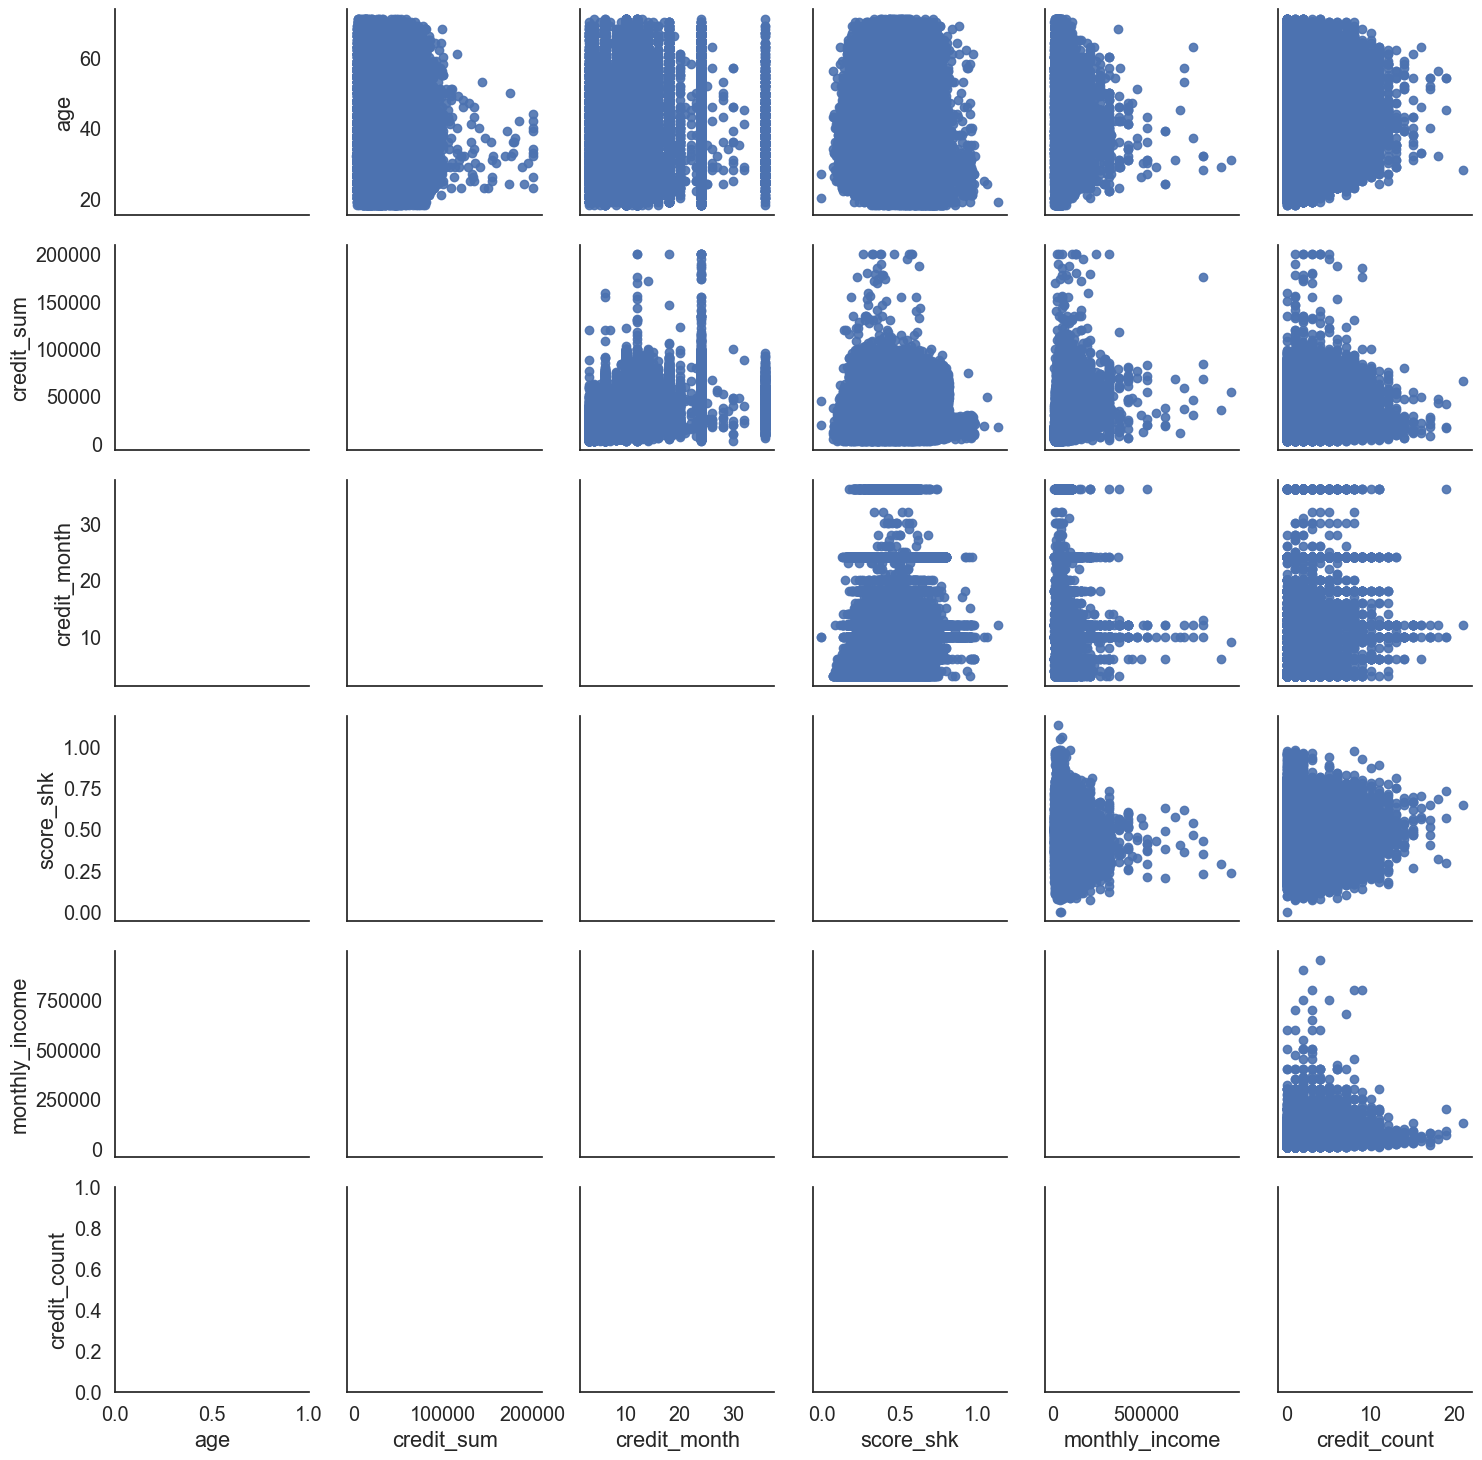

In [9]:
sns.set(style='white', font_scale=1.3)

g = sns.PairGrid(data=data[['age', 'credit_sum','credit_month', 'score_shk', 'monthly_income','credit_count']], diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.9)


Построим отдельные графики для детального анализа

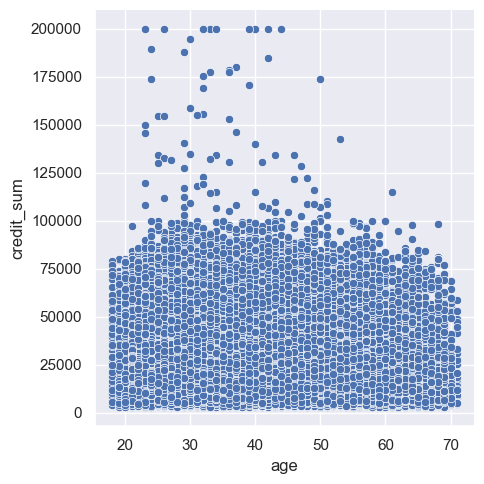

In [10]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=data,
    x="age", y="credit_sum"
)

Наблюдаем, что суммы кредитов более 100000 выдают людям моложе 50 лет.

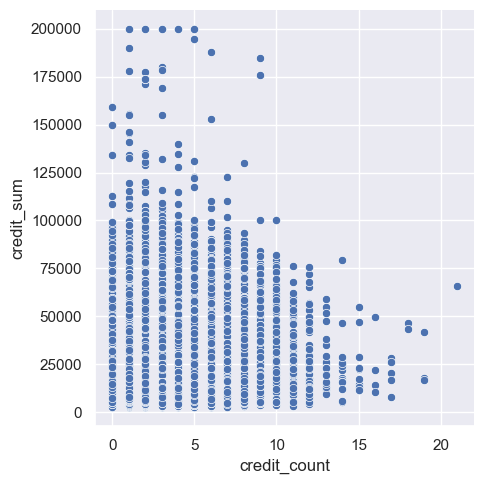

In [11]:
sns.relplot(
    data=data,
    x="credit_count", y="credit_sum"
)

Чем больше количество кредитов, тем меньше сумма нового кредита

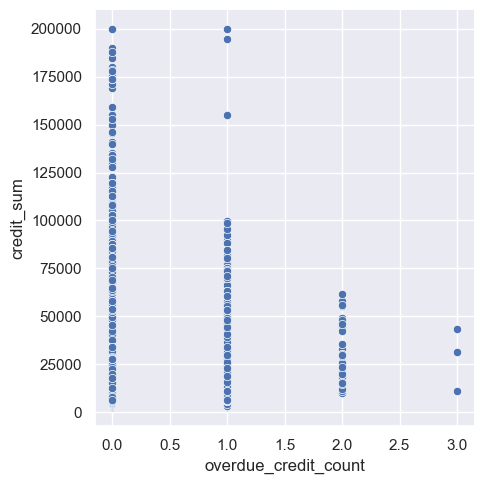

In [12]:
sns.relplot(
    data=data,
    x="overdue_credit_count", y=data['credit_sum']
)

In [13]:
data.isna().sum()

client_id                  0
gender                     0
age                        3
marital_status             3
job_position               0
credit_sum                 2
credit_month               0
tariff_id                  0
score_shk                  7
education                  5
living_region              0
monthly_income             5
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

Видим что незаполненных данных в слобцах age, marital_status, credit_sum,score_shk, education,monthly_income в сумме 25 штук. Не вижу смысла заменять на какие нибудь средние значения эти пропуски. Проще удалить. В столбцах credit_count, overdue_credit_count пропусков намного больше, но, опять же, заменять на сурогатные значения не вижу смысла, т.к. на мой взгляд эти колонки важны для принятия решения о выдачи кредита, а заменяя их на среднее мы внесем значительную погрешность в принятии решений.

Сформируем две отфильтрованные выборки. data1, будет просто очищена от пустных значений (на мой взгляд выбросы в данной задаче необходимо оставлять, т.к. они являются важными часными случаями, которые нужно обработать особенно тщательно)

In [14]:
data1 = data.dropna()


In [15]:
data1.isna().sum()

client_id               0
gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
living_region           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64

Разобьём наш дата сет на тренировочную и тестовую выборку

In [16]:
from sklearn.model_selection import train_test_split
X = data1
data1_train, data1_test = train_test_split(data1, train_size=0.7, random_state=42)

In [17]:
data1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48452 entries, 144143 to 163976
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             48452 non-null  int64  
 1   gender                48452 non-null  object 
 2   age                   48452 non-null  float64
 3   marital_status        48452 non-null  object 
 4   job_position          48452 non-null  object 
 5   credit_sum            48452 non-null  float64
 6   credit_month          48452 non-null  int64  
 7   tariff_id             48452 non-null  object 
 8   score_shk             48452 non-null  float64
 9   education             48452 non-null  object 
 10  living_region         48452 non-null  string 
 11  monthly_income        48452 non-null  float64
 12  credit_count          48452 non-null  float64
 13  overdue_credit_count  48452 non-null  float64
 14  open_account_flg      48452 non-null  int64  
dtypes: float64(6)

array([[<AxesSubplot:title={'center':'client_id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'credit_sum'}>],
       [<AxesSubplot:title={'center':'credit_month'}>,
        <AxesSubplot:title={'center':'score_shk'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'credit_count'}>,
        <AxesSubplot:title={'center':'overdue_credit_count'}>,
        <AxesSubplot:title={'center':'open_account_flg'}>]], dtype=object)

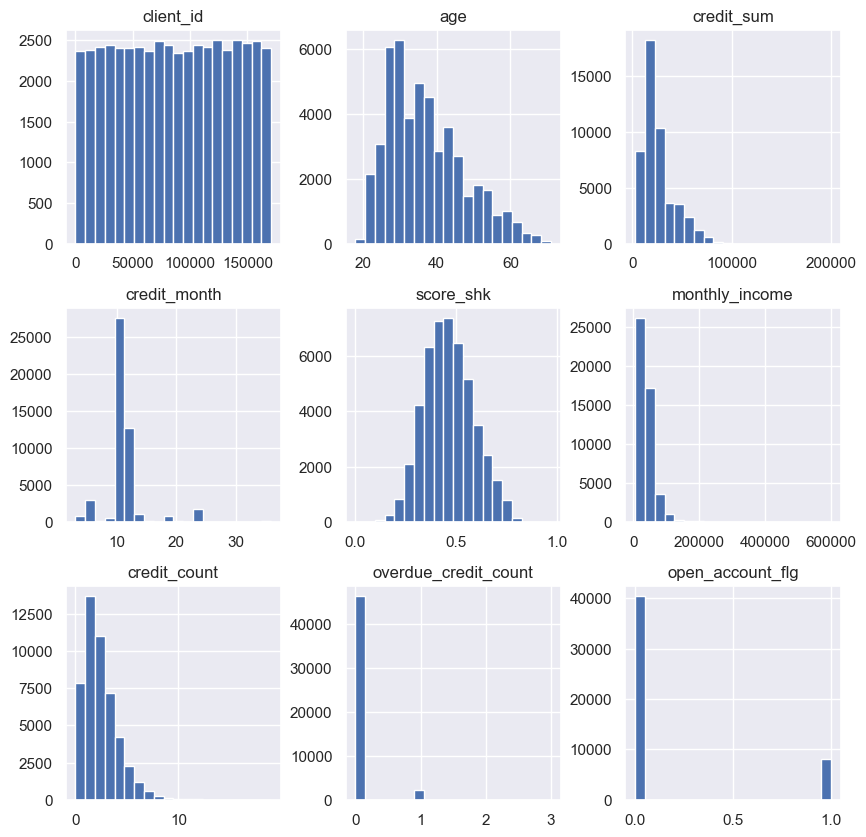

In [18]:
data1_test.hist(bins = 20, figsize = (10, 10))

array([[<AxesSubplot:title={'center':'client_id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'credit_sum'}>],
       [<AxesSubplot:title={'center':'credit_month'}>,
        <AxesSubplot:title={'center':'score_shk'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'credit_count'}>,
        <AxesSubplot:title={'center':'overdue_credit_count'}>,
        <AxesSubplot:title={'center':'open_account_flg'}>]], dtype=object)

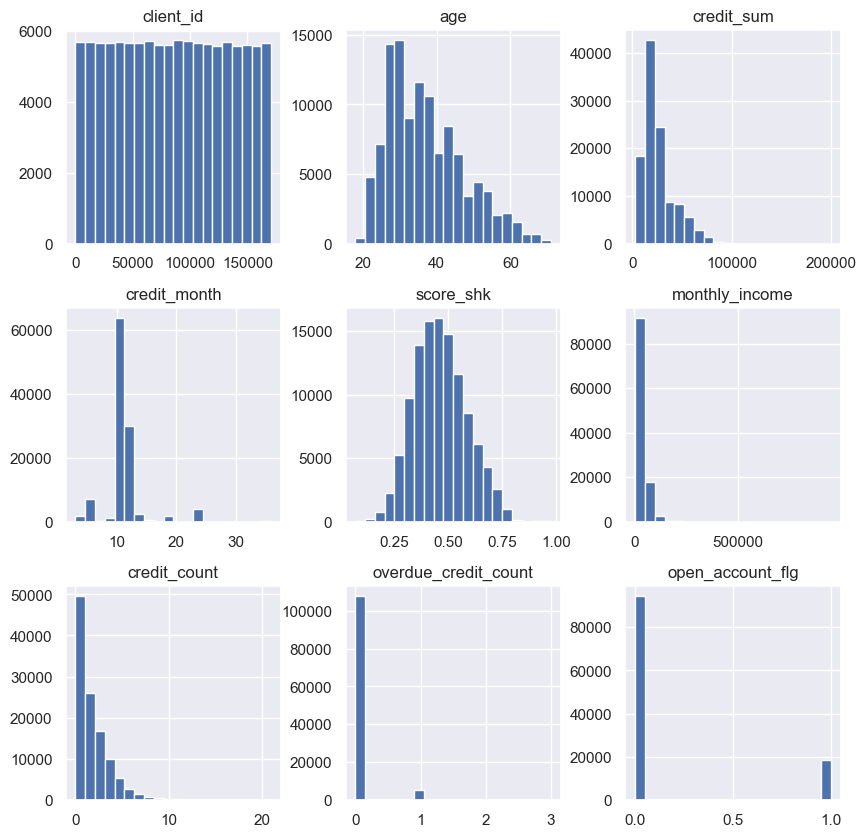

In [19]:
data1_train.hist(bins = 20, figsize = (10, 10))

После очистки данных видим, что расспределения данных тренеровочной и тестовой выборок осталось таким же, как и исходном датасете

Построим графики попарных отношений наших тестовой и тренеровочной выборок

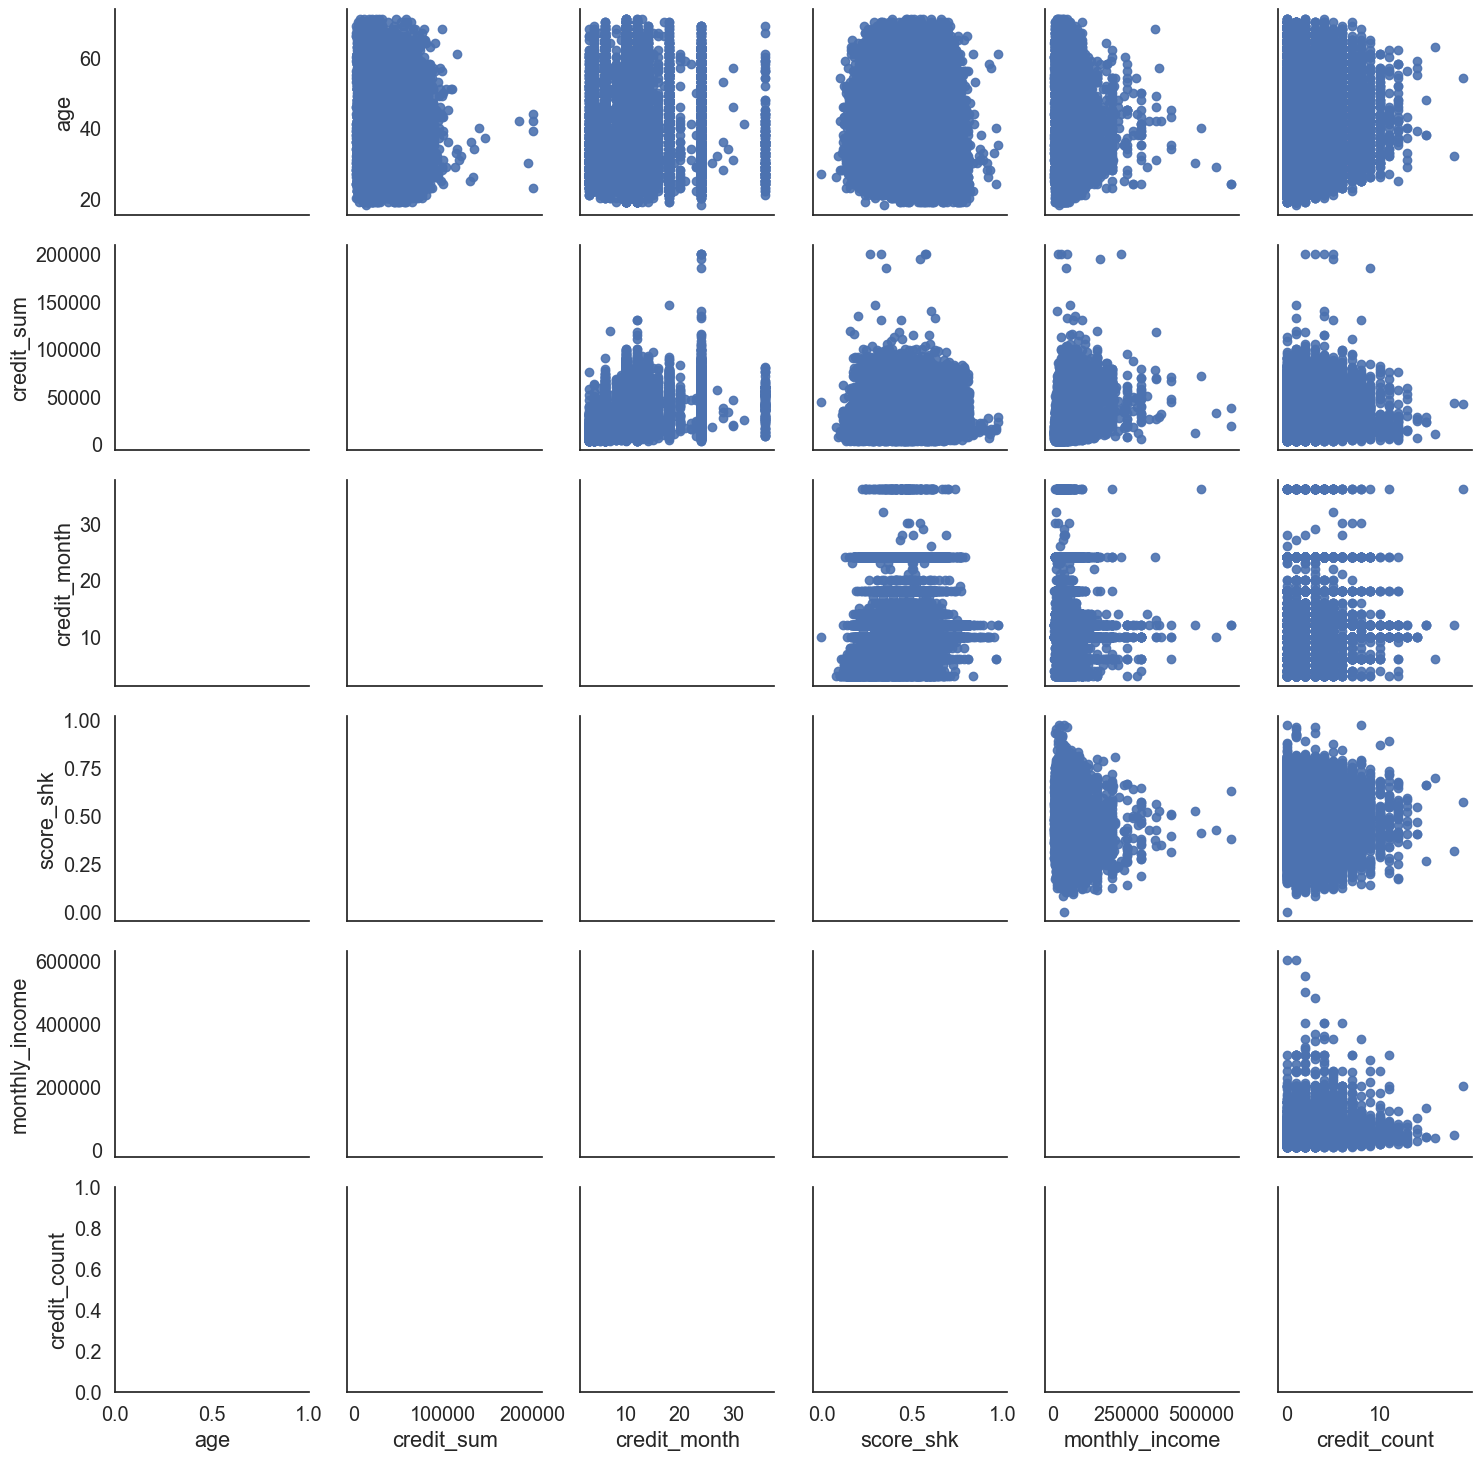

In [20]:
sns.set(style='white', font_scale=1.3)

g = sns.PairGrid(data=data1_test[['age', 'credit_sum','credit_month', 'score_shk', 'monthly_income','credit_count']], diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.9)


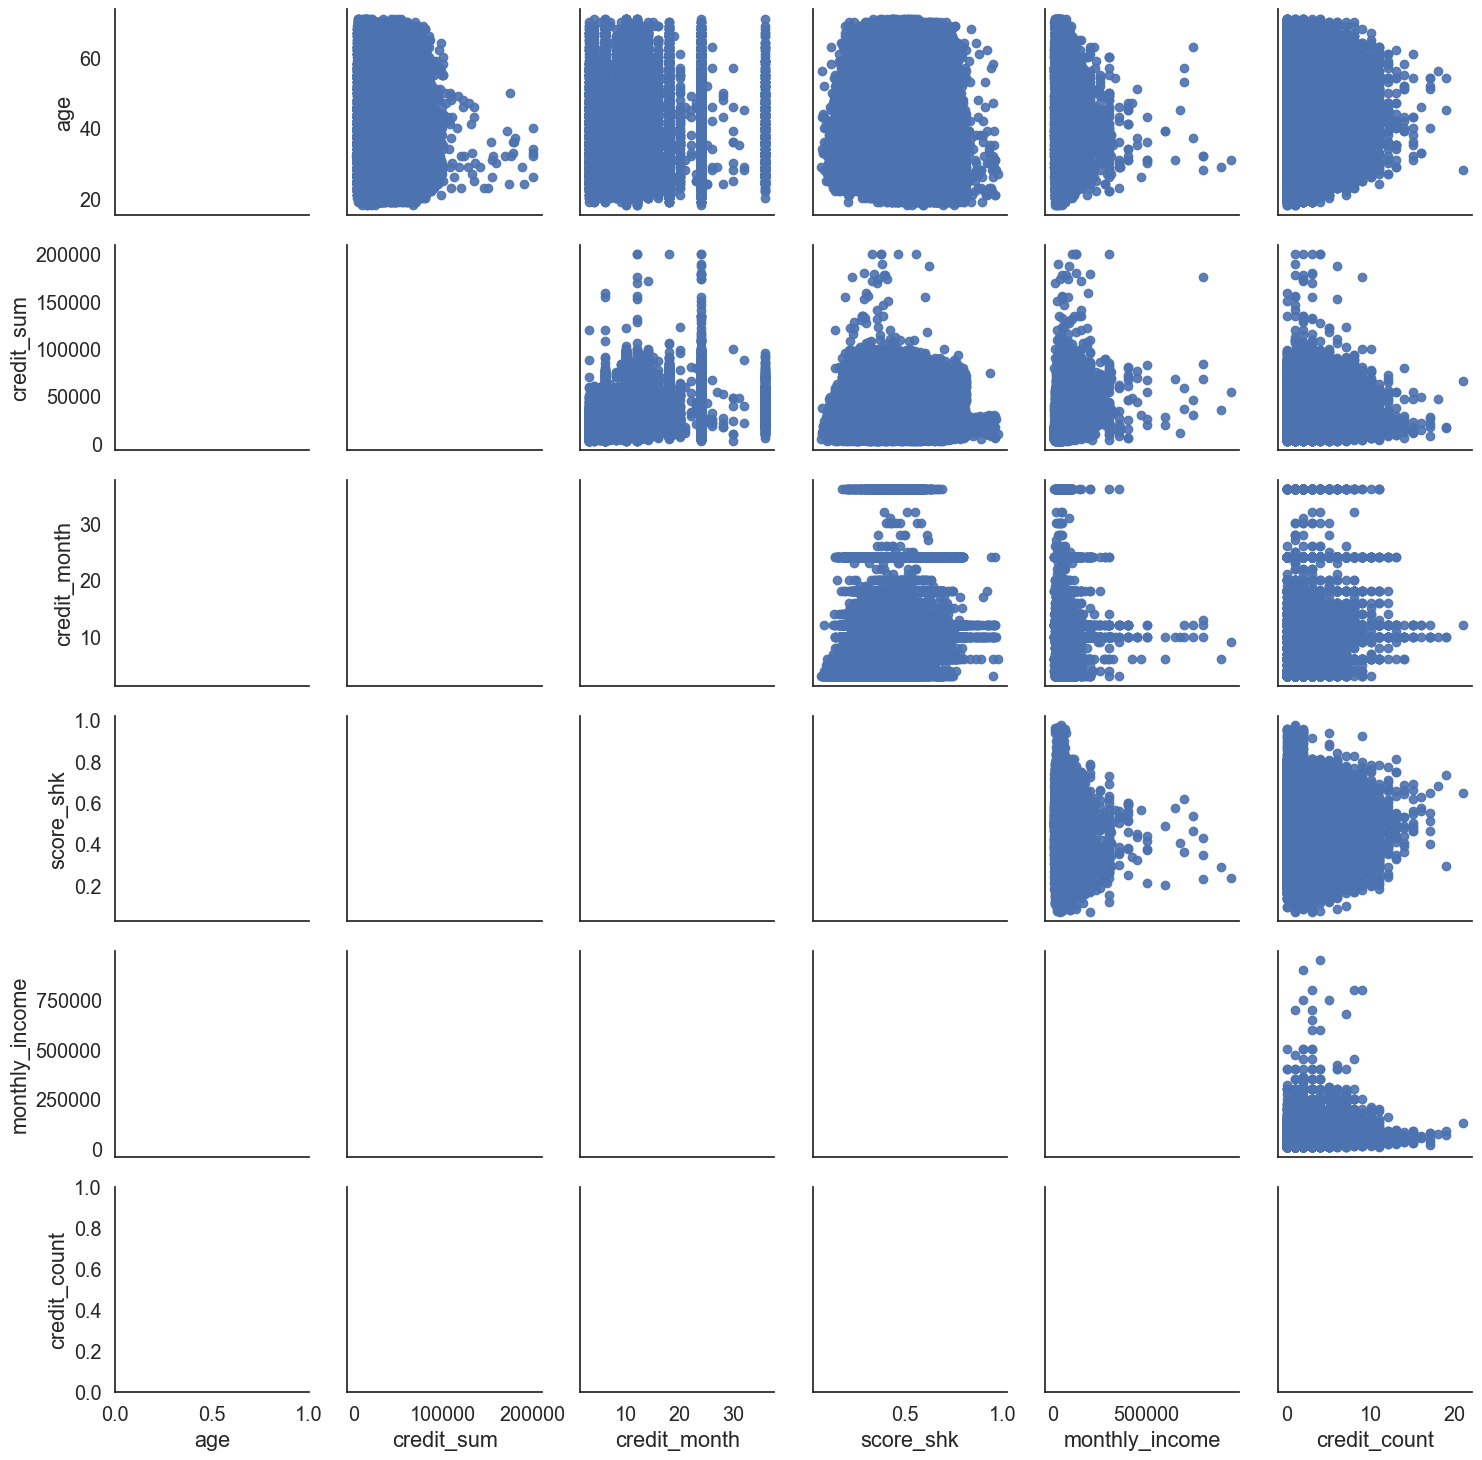

In [21]:
sns.set(style='white', font_scale=1.3)

g = sns.PairGrid(data=data1_train[['age', 'credit_sum','credit_month', 'score_shk', 'monthly_income','credit_count']], diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.9)


Вцелом данные в выборках ведут себя +- одинаково

# Пронормируем наши значения используя StandardScaler(), для тренеровочной и тестовой выборок. Нормировал столбцы 'credit_sum','monthly_income'

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sdata1_test = scaler.fit_transform(data1_test[['credit_sum','monthly_income']])
sdata1_train = scaler.fit_transform(data1_train[['credit_sum','monthly_income']])

In [23]:
data1_test['credit_sum']=sdata1_test[:,0]
data1_test['monthly_income']=sdata1_test[:,1]
data1_train['credit_sum']=sdata1_train[:,0]
data1_train['monthly_income']=sdata1_train[:,1]

In [24]:
sdata1_test

array([[-0.80612085, -0.9515305 ],
       [ 1.10461507,  0.38963213],
       [ 1.97232851,  0.38963213],
       ...,
       [-1.1818686 , -0.41829717],
       [-0.59191005, -0.21631484],
       [-0.11871864, -0.62027949]])

In [25]:
data1_test

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
144143,144144,F,61.0,UNM,PNA,-0.806121,10,1.1,0.447494,SCH,РЕСПУБЛИКА КАРЕЛИЯ,-0.951530,1.0,0.0,0
79659,79660,M,35.0,MAR,ATP,1.104615,10,1.1,0.432732,GRD,РЕСПУБЛИКА БАШКОРТОСТАН,0.389632,2.0,0.0,0
51489,51490,F,28.0,DIV,SPC,1.972329,10,1.1,0.373456,GRD,КУРГАНСКАЯ ОБЛАСТЬ,0.389632,3.0,0.0,0
13654,13655,M,36.0,MAR,SPC,0.179000,10,1.20,0.207858,GRD,САНКТ-ПЕТЕРБУРГ,3.217385,2.0,0.0,0
2959,2960,F,52.0,MAR,DIR,2.934420,18,1.1,0.259887,GRD,КАМЧАТСКАЯ ОБЛАСТЬ,2.005491,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23896,23897,F,52.0,MAR,SPC,0.178889,10,1.16,0.376031,GRD,ВОЛОГОДСКАЯ ОБЛАСТЬ,-0.539487,3.0,0.0,0
168770,168771,F,30.0,MAR,SPC,-1.040857,10,1.1,0.499075,GRD,ЯРОСЛАВСКАЯ ОБЛАСТЬ,-1.024244,1.0,0.0,1
110601,110602,F,50.0,DIV,SPC,-1.181869,10,1.1,0.503747,SCH,МОСКОВСКАЯ ОБЛАСТЬ,-0.418297,4.0,0.0,0
157852,157853,M,28.0,UNM,SPC,-0.591910,10,1.1,0.411233,UGR,САНКТ-ПЕТЕРБУРГ,-0.216315,2.0,0.0,0


# Построим таблицу корелляции

In [26]:
corr_matrix1 = data1_train.corr()
corr_matrix1

,client_id,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
client_id,1.000000,0.000134,-0.005195,-0.002655,0.004193,-0.003075,-0.000427,-0.008570,0.002603
age,0.000134,1.000000,-0.085760,0.008719,-0.138649,-0.028347,0.114865,0.008887,0.005472
credit_sum,-0.005195,-0.085760,1.000000,0.228915,0.049656,0.354785,0.014725,-0.004869,-0.077394
credit_month,-0.002655,0.008719,0.228915,1.000000,0.041459,0.006907,0.053058,0.007898,0.020665
score_shk,0.004193,-0.138649,0.049656,0.041459,1.000000,-0.102700,-0.091480,0.171501,0.036066
monthly_income,-0.003075,-0.028347,0.354785,0.006907,-0.102700,1.000000,0.144503,0.032381,-0.016762
credit_count,-0.000427,0.114865,0.014725,0.053058,-0.091480,0.144503,1.000000,0.176631,0.038271
overdue_credit_count,-0.008570,0.008887,-0.004869,0.007898,0.171501,0.032381,0.176631,1.000000,0.025305
open_account_flg,0.002603,0.005472,-0.077394,0.020665,0.036066,-0.016762,0.038271,0.025305,1.000000


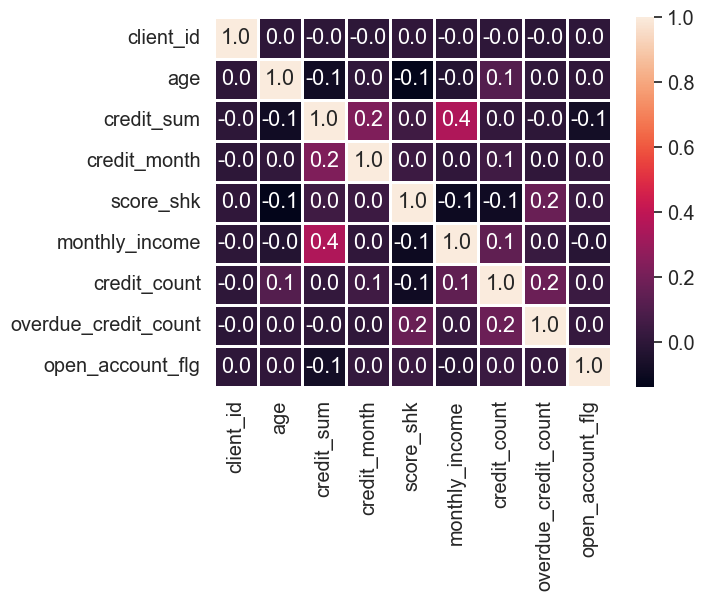

In [27]:
sns.heatmap(corr_matrix1, annot=True, linewidths=1, fmt=".1f");

In [28]:
corr_matrix2 = data1_test.corr()
corr_matrix2

,client_id,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
client_id,1.000000,-0.002124,0.004543,0.005237,-0.004607,0.000547,0.007550,0.002661,0.000168
age,-0.002124,1.000000,-0.082173,0.002975,-0.142592,-0.031941,0.120902,0.005174,0.004690
credit_sum,0.004543,-0.082173,1.000000,0.229784,0.046703,0.361238,0.018400,-0.001404,-0.077017
credit_month,0.005237,0.002975,0.229784,1.000000,0.045206,0.007671,0.044074,0.003024,0.026730
score_shk,-0.004607,-0.142592,0.046703,0.045206,1.000000,-0.103481,-0.099835,0.168214,0.041507
monthly_income,0.000547,-0.031941,0.361238,0.007671,-0.103481,1.000000,0.151286,0.036936,-0.015995
credit_count,0.007550,0.120902,0.018400,0.044074,-0.099835,0.151286,1.000000,0.178948,0.030798
overdue_credit_count,0.002661,0.005174,-0.001404,0.003024,0.168214,0.036936,0.178948,1.000000,0.019162
open_account_flg,0.000168,0.004690,-0.077017,0.026730,0.041507,-0.015995,0.030798,0.019162,1.000000


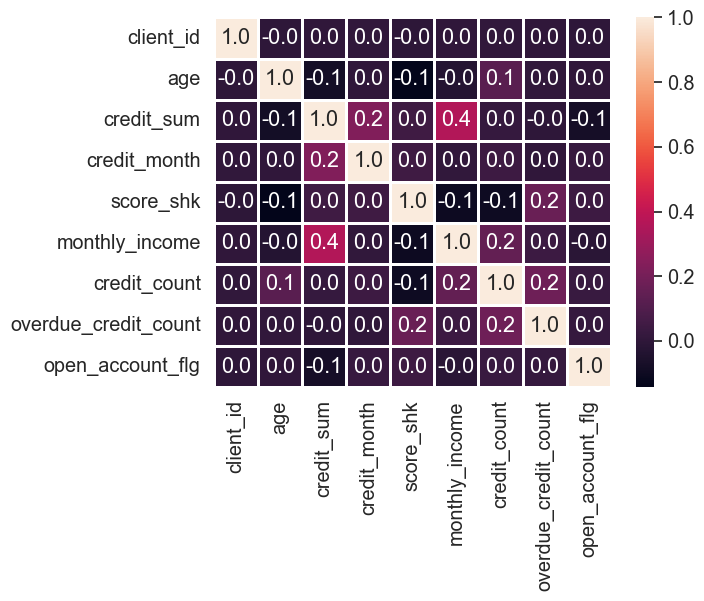

In [29]:
sns.heatmap(corr_matrix2, annot=True, linewidths=1, fmt=".1f");

Прослеживаются слабые корелляции одних и тех же величиен в общем датасете и в выборках (credit_sum, monthly_income). Хотя по логике должна быть более сильная корелляция

# Проведем тесты на нормальность по Пирсону (только для тех величин, распределение которых хоть как то похожи на нормальный закон))

In [30]:
stat, p = stats.normaltest(data1_test['age'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=3524.698, p-value=0.000
Отклонить гипотезу о нормальности


In [31]:
stat, p = stats.normaltest(data1_test['score_shk'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=616.131, p-value=0.000
Отклонить гипотезу о нормальности


In [32]:
stat, p = stats.normaltest(data1_train['age'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=8261.324, p-value=0.000
Отклонить гипотезу о нормальности


In [33]:
stat, p = stats.normaltest(data1_train['score_shk'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=1439.736, p-value=0.000
Отклонить гипотезу о нормальности


На нормальность не прошли тесты:)